Loading Dataset

In [15]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [16]:
data = datasets.load_iris()
X, y = data.data, data.target

Model

In [17]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))
        
        for c in class_labels:
            X_c = X[y==c]
            mean_c = np.mean(X_c, axis=0)
            
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            
            n_c = X_c.shape[0]
            
            mean_diff = (mean_c - mean_overall).reshape((n_features, 1))
            S_B += n_c * mean_diff.dot(mean_diff.T)
            
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idx = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[idx]
        self.linear_discriminants = eigenvectors[:self.n_components]
        
        
        
    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

Testing and Plot

In [18]:
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

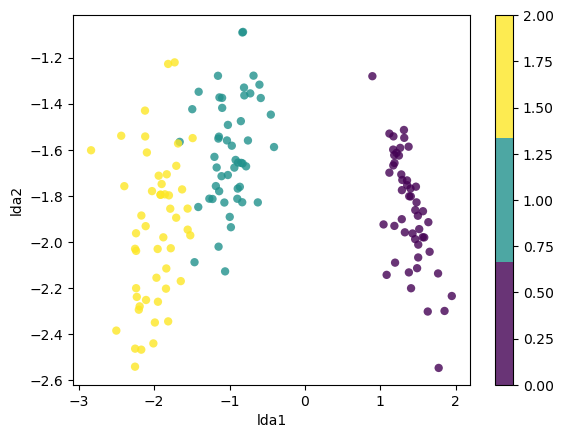

In [19]:
x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1, x2, c=y, edgecolor='none', alpha=.8, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('lda1')
plt.ylabel('lda2')
plt.colorbar()
plt.show()